In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv("titanic/train.csv")

In [3]:
data_test = pd.read_csv("titanic/test.csv")

In [4]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Normalize Columns DATA

In [5]:
y_train = np.array(data_train['Survived'])
y_train.shape

(891,)

In [6]:
c0_passengerId = np.array(data_train['PassengerId'])

In [7]:
c1_Pclass = np.array(data_train['Pclass'])
c1_Pclass.shape

(891,)

### SEX : Replace male with 1 and femal with 0



In [8]:
data_train['Sex'] = data_train['Sex'].replace('male',1)
data_train['Sex'] = data_train['Sex'].replace('female',0)

In [9]:
c2_Sex = np.array(data_train['Sex'])

In [10]:
c2_Sex.shape

(891,)

In [11]:
data_train.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
0,314,314,314,314,261,314,314,314,314,97,312
1,577,577,577,577,453,577,577,577,577,107,577


In [12]:
data_train.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
0,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
1,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


### AGE : Replace nan values by -1

In [13]:
c3_age = np.array(data_train['Age'].replace(np.nan, -1))

In [14]:
my_dict = {i:c3_age.tolist().count(i) for i in c3_age.tolist()}
my_dict

{22.0: 27,
 38.0: 11,
 26.0: 18,
 35.0: 18,
 -1.0: 177,
 54.0: 8,
 2.0: 10,
 27.0: 18,
 14.0: 6,
 4.0: 10,
 58.0: 5,
 20.0: 15,
 39.0: 14,
 55.0: 2,
 31.0: 17,
 34.0: 15,
 15.0: 5,
 28.0: 25,
 8.0: 4,
 19.0: 25,
 40.0: 13,
 66.0: 1,
 42.0: 13,
 21.0: 24,
 18.0: 26,
 3.0: 6,
 7.0: 3,
 49.0: 6,
 29.0: 20,
 65.0: 3,
 28.5: 2,
 5.0: 4,
 11.0: 4,
 45.0: 12,
 17.0: 13,
 32.0: 18,
 16.0: 17,
 25.0: 23,
 0.83: 2,
 30.0: 25,
 33.0: 15,
 23.0: 15,
 24.0: 30,
 46.0: 3,
 59.0: 2,
 71.0: 2,
 37.0: 6,
 47.0: 9,
 14.5: 1,
 70.5: 1,
 32.5: 2,
 12.0: 1,
 9.0: 8,
 36.5: 1,
 51.0: 7,
 55.5: 1,
 40.5: 2,
 44.0: 9,
 1.0: 7,
 61.0: 3,
 56.0: 4,
 50.0: 10,
 36.0: 22,
 45.5: 2,
 20.5: 1,
 62.0: 4,
 41.0: 6,
 52.0: 6,
 63.0: 2,
 23.5: 1,
 0.92: 1,
 43.0: 5,
 60.0: 4,
 10.0: 2,
 64.0: 2,
 13.0: 2,
 48.0: 9,
 0.75: 2,
 53.0: 1,
 57.0: 2,
 80.0: 1,
 70.0: 2,
 24.5: 1,
 6.0: 3,
 0.67: 1,
 30.5: 2,
 0.42: 1,
 34.5: 1,
 74.0: 1}

### AGE : Group age by categories

In [15]:
c3_age_categori = np.copy(c3_age)

for i in range(len(c3_age)):
    if (0.1 <= c3_age[i] <= 6):
        c3_age_categori[i] = 1 # baby
    elif (6.1 <= c3_age[i] <= 13):
        c3_age_categori[i] = 2 # Enfant
    elif (13.1 <= c3_age[i] <= 19):
        c3_age_categori[i] = 3 # ado
    elif (19.1 <= c3_age[i] <= 30):
        c3_age_categori[i] = 4 # jeune
    elif (30.1 <= c3_age[i] <= 45):
        c3_age_categori[i] = 5 # Adulte
    elif (45.1 <= c3_age[i]):
        c3_age_categori[i] = 6 # Senior
    
        

In [16]:
my_dict = {i:c3_age_categori.tolist().count(i) for i in c3_age_categori.tolist()}
my_dict

{4.0: 245, 5.0: 202, -1.0: 177, 6.0: 103, 1.0: 47, 3.0: 93, 2.0: 24}

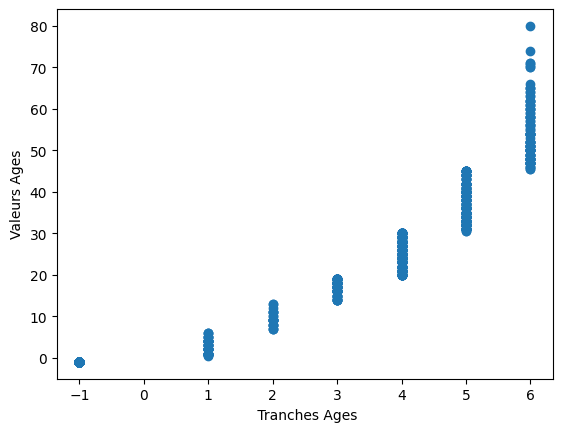

In [17]:
plt.scatter(c3_age_categori,c3_age)
plt.xlabel(" Tranches Ages")
plt.ylabel("Valeurs Ages")
plt.show()

In [18]:
data_train.groupby("Age").mean()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
Age,,,,,,,
0.42,804.0,1.0,3.0,1.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,0.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,1.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...,...,...
70.00,709.5,0.0,1.5,1.0,0.5,0.5,40.7500
70.50,117.0,0.0,3.0,1.0,0.0,0.0,7.7500
71.00,295.5,0.0,1.0,1.0,0.0,0.0,42.0792


### let SibSP, Parch and Fare

In [19]:
c4_sibsp = np.array(data_train['SibSp'])

In [20]:
c5_parch = np.array(data_train['Parch'])

In [21]:
c6_fare = np.array(data_train['Fare'])

In [22]:
c7_embarked = np.array(data_train['Embarked'])

### Drop Cabin,Ticket and Name 

In [23]:
c8_cabin= np.array(data_train['Cabin']) #à rejeter

In [24]:
c9_Ticket = np.array(data_train['Ticket']) # a rejeter

In [25]:
c10_name = np.array(data_train['Name']) # a rejeter

In [26]:
new_data = pd.DataFrame({"PassengerID": c0_passengerId,
                        "Survived": y_train,
                         "Pclass":c1_Pclass,
                         "Sex":c2_Sex,
                         "Age":c3_age_categori,
                        "SibSp":c4_sibsp,
                        "Parch":c5_parch,
                         "Fare":c6_fare,
                        "Embarked":c7_embarked})

### Embarked : remove the two nan rows

In [27]:
new_data.loc[new_data["Embarked"].isnull()]
titanic_df_train = new_data.loc[new_data["Embarked"].notna()]

### Embarked : replace  C,Q,S by 1,2,3

In [28]:
titanic_df_train["Embarked"].replace({"C": 1, "Q": 2,"S": 3}, inplace=True)

/opt/anaconda3/envs/opencv-contrib-python/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [29]:
titanic_df_train.groupby('Embarked').count()

,PassengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
1,168,168,168,168,168,168,168,168
2,77,77,77,77,77,77,77,77
3,644,644,644,644,644,644,644,644


### Now we have our Train Data normalized

In [30]:
titanic_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [31]:
titanic_df_train.isnull().sum()

PassengerID    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [32]:
titanic_df_train.describe()

,PassengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,3.142857,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,0.477538,2.371199,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,1.000000,4.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,6.000000,8.000000,6.000000,512.329200,3.000000


In [33]:
titanic_df_train.head()

,PassengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,4.0,1,0,7.2500,3
1,2,1,1,0,5.0,1,0,71.2833,1
2,3,1,3,0,4.0,0,0,7.9250,3
3,4,1,1,0,5.0,1,0,53.1000,3
4,5,0,3,1,5.0,0,0,8.0500,3


In [34]:
titanic_df_train.groupby("Survived").mean()

,PassengerID,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,447.016393,2.531876,0.852459,3.076503,0.553734,0.329690,22.117887,2.641166
1,444.358824,1.955882,0.320588,3.250000,0.476471,0.467647,48.209498,2.364706


### Now we do same processing to Test Data

In [35]:
data_test = pd.read_csv("titanic/test.csv")
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [36]:
for i in range(len(data_test["Age"])):
    if (0.1 <= data_test["Age"][i] <= 6):
        data_test["Age"][i] = 1 # baby
    elif (6.1 <= data_test["Age"][i] <= 13):
        data_test["Age"][i] = 2 # Enfant
    elif (13.1 <= data_test["Age"][i] <= 19):
        data_test["Age"][i] = 3 # ado
    elif (19.1 <= data_test["Age"][i] <= 30):
        data_test["Age"][i] = 4 # jeune
    elif (30.1 <= data_test["Age"][i] <= 45):
        data_test["Age"][i] = 5 # Adulte
    elif (45.1 <= data_test["Age"][i]):
        data_test["Age"][i] = 6 # Senior
    else :
        data_test["Age"][i]=-1
    
        

/opt/anaconda3/envs/opencv-contrib-python/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/opencv-contrib-python/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/envs/opencv-contrib-python/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [37]:
data_test["Embarked"].replace({"C": 1, "Q": 2,"S": 3}, inplace=True)

In [38]:
data_test= data_test.drop(columns=["Cabin","Name","Ticket"])

In [39]:
data_test["Sex"].replace({"male": 1, "female": 0}, inplace=True)

In [40]:
data_test.loc[data_test["Fare"].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,1,6.0,0,0,NaN,3


In [41]:
# Drop the Row with Fare NaN with the mean value
data_test["Fare"] =data_test["Fare"].replace([np.nan],data_test["Fare"].mean())

In [42]:
data_test.loc[data_test["Fare"].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


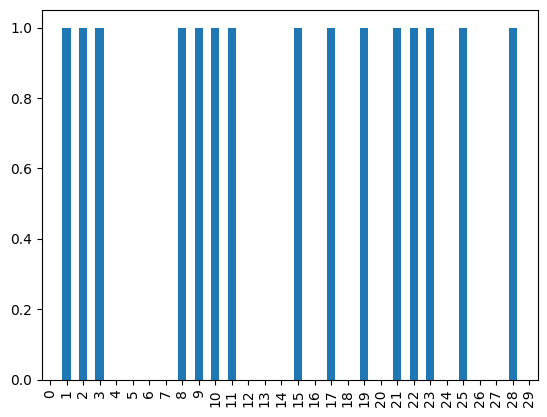

In [43]:
titanic_df_train["Survived"].head(30).plot(kind = "bar")
plt.show()

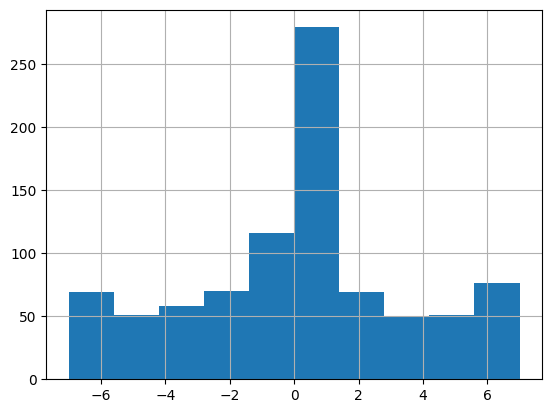

In [44]:
titanic_df_train["Age"].diff().hist()
plt.show()

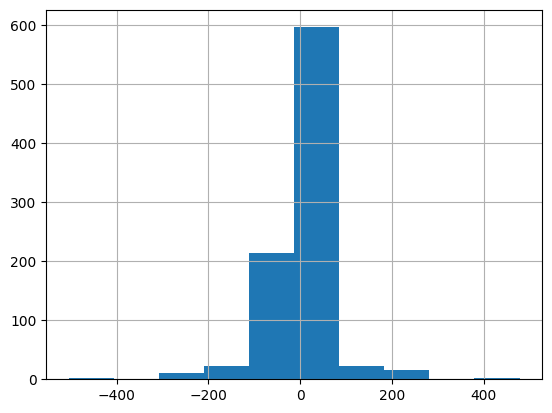

In [45]:
titanic_df_train["Fare"].diff().hist()
plt.show()

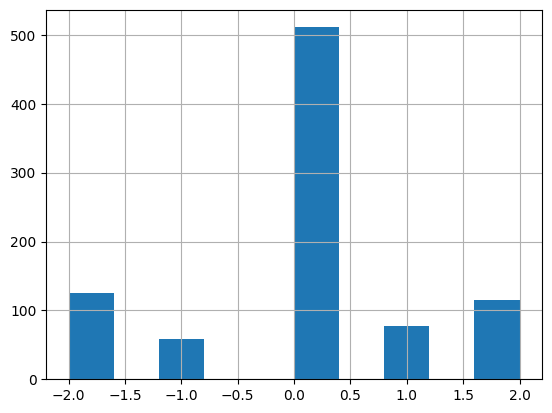

In [46]:
titanic_df_train["Embarked"].diff().hist()
plt.show()

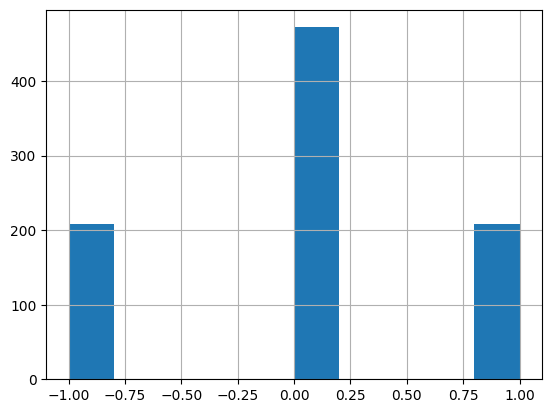

In [47]:
titanic_df_train["Sex"].diff().hist()
plt.show()

# Models Fitting

In [48]:
tr_df = titanic_df_train

In [49]:
tst_df = data_test

In [50]:
tr_df

,PassengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,4.0,1,0,7.2500,3
1,2,1,1,0,5.0,1,0,71.2833,1
2,3,1,3,0,4.0,0,0,7.9250,3
3,4,1,1,0,5.0,1,0,53.1000,3
4,5,0,3,1,5.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,4.0,0,0,13.0000,3
887,888,1,1,0,3.0,0,0,30.0000,3
888,889,0,3,0,-1.0,1,2,23.4500,3
889,890,1,1,1,4.0,0,0,30.0000,1


In [51]:
tst_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,5.0,0,0,7.8292,2
1,893,3,0,6.0,1,0,7.0000,3
2,894,2,1,6.0,0,0,9.6875,2
3,895,3,1,4.0,0,0,8.6625,3
4,896,3,0,4.0,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
413,1305,3,1,-1.0,0,0,8.0500,3
414,1306,1,0,5.0,0,0,108.9000,1
415,1307,3,1,5.0,0,0,7.2500,3
416,1308,3,1,-1.0,0,0,8.0500,3


In [52]:
y_train = np.array(tr_df["Survived"])

In [53]:
x_train= np.array(tr_df.drop(['Survived',"PassengerID"], axis = 1))

In [54]:
x_test = np.array(tst_df.drop("PassengerId", axis = 1))

In [55]:
y_test = np.array(pd.read_csv("titanic/gender_submission.csv")["Survived"])

In [56]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((889, 7), (889,), (418, 7), (418,))

In [57]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import r2_score

/opt/anaconda3/envs/opencv-contrib-python/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [58]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=r2_score)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

 97%|█████████▋| 28/29 [00:01<00:00, 24.54it/s]

[23:40:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:01<00:00, 15.97it/s]


In [59]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      1.00               1.00     1.00      1.00   
CalibratedClassifierCV             0.99               0.99     0.99      0.99   
LinearSVC                          0.99               0.99     0.99      0.99   
RidgeClassifierCV                  0.99               0.99     0.99      0.99   
RidgeClassifier                    0.99               0.99     0.99      0.99   
LinearDiscriminantAnalysis         0.99               0.98     0.98      0.99   
NuSVC                              0.98               0.98     0.98      0.98   
LogisticRegression                 0.97               0.97     0.97      0.97   
NearestCentroid                    0.91               0.93     0.93      0.91   
AdaBoostClassifier                 0.92               0.92     0.92      0.92   
SVC                         

In [60]:
predictions = predictions.sort_values(by = "Accuracy")
predictions.style.background_gradient(cmap ='viridis')

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,r2_score,Time Taken
Model,,,,,,
DummyClassifier,0.56,0.53,0.53,0.56,-0.92,0.01
Perceptron,0.60,0.54,0.54,0.59,-0.72,0.01
ExtraTreeClassifier,0.79,0.77,0.77,0.79,0.08,0.01
PassiveAggressiveClassifier,0.80,0.79,0.79,0.80,0.12,0.01
ExtraTreesClassifier,0.82,0.80,0.80,0.82,0.22,0.13
DecisionTreeClassifier,0.82,0.81,0.81,0.82,0.23,0.01
KNeighborsClassifier,0.83,0.83,0.83,0.83,0.26,0.02
LabelPropagation,0.83,0.82,0.82,0.83,0.27,0.03
BaggingClassifier,0.83,0.82,0.82,0.83,0.28,0.04


### SGDC 

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

In [62]:
parameters = {'loss':('log','hinge', 'perceptron','modified_huber'), 
              'penalty':('l1','l2'),
             'alpha':[0.0001,0.01,0.1,0.2,0.3,0.4,0.5],
             'max_iter':[500,1000,2000],
             'n_jobs':[-1],
             'learning_rate':('constant','optimal','invscaling','adaptive'),
             'eta0':[0.01,0.1,1.0,2.0]}

In [72]:
sgdclass = SGDClassifier()

In [76]:
cv = GridSearchCV(sgdclass, parameters,verbose=1, n_jobs=-1)

In [77]:
cv

GridSearchCV(estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'eta0': [0.01, 0.1, 1.0, 2.0],
                         'learning_rate': ('constant', 'optimal', 'invscaling',
                                           'adaptive'),
                         'loss': ('log', 'hinge', 'perceptron',
                                  'modified_huber'),
                         'max_iter': [500, 1000, 2000], 'n_jobs': [-1],
                         'penalty': ('l1', 'l2')},
             verbose=1)

In [78]:
cv.fit(x_train, y_train)

Fitting 5 folds for each of 2688 candidates, totalling 13440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 13440 out of 13440 | elapsed:   13.3s finished


GridSearchCV(estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'eta0': [0.01, 0.1, 1.0, 2.0],
                         'learning_rate': ('constant', 'optimal', 'invscaling',
                                           'adaptive'),
                         'loss': ('log', 'hinge', 'perceptron',
                                  'modified_huber'),
                         'max_iter': [500, 1000, 2000], 'n_jobs': [-1],
                         'penalty': ('l1', 'l2')},
             verbose=1)

In [79]:
print("Le meilleur score obtenu est : ", cv.best_score_)
print("Les meilleurs parametres sont : ", cv.best_params_)
print("Le meilleur estimateur est : " , cv.best_estimator_)

Le meilleur score obtenu est :  0.7930362470640513
Les meilleurs parametres sont :  {'alpha': 0.1, 'eta0': 2.0, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'max_iter': 500, 'n_jobs': -1, 'penalty': 'l1'}
Le meilleur estimateur est :  SGDClassifier(alpha=0.1, eta0=2.0, learning_rate='adaptive',
              loss='modified_huber', max_iter=500, n_jobs=-1, penalty='l1')


In [80]:
sgdc3 = SGDClassifier(alpha=0.1, eta0=1.0, learning_rate='adaptive',loss='modified_huber', max_iter=500, n_jobs=-1, penalty='l1')

In [81]:
sgdc3.fit(x_train,y_train)

SGDClassifier(alpha=0.1, eta0=1.0, learning_rate='adaptive',
              loss='modified_huber', max_iter=500, n_jobs=-1, penalty='l1')

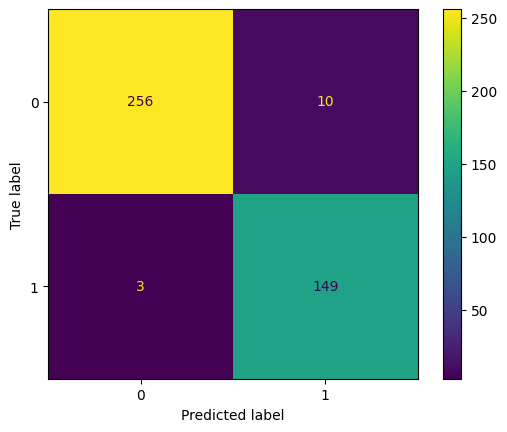

In [82]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgdc3, x_test, y_test)
plt.show()

In [83]:
sgdc3.score(x_test,y_test)

0.9688995215311005

Awesome 😎 we got ~ 97% accuracy

In [84]:
result = pd.DataFrame([])

In [85]:
result["PassengerId"] = tst_df['PassengerId']

In [86]:
result["Survived"] = sgdc3.predict(x_test)

In [87]:
result.to_csv('submission.csv', index=False)